In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Student dataset

In [2]:
df = pd.read_csv("student_scores.csv")

In [3]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


# Exploratory Data Analysis

In [4]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


# Data Preprocessing

In [7]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [84]:
# Changing weekly study hours column

df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


# DATA ANALYSIS

# Gender Distribution: Female and Male

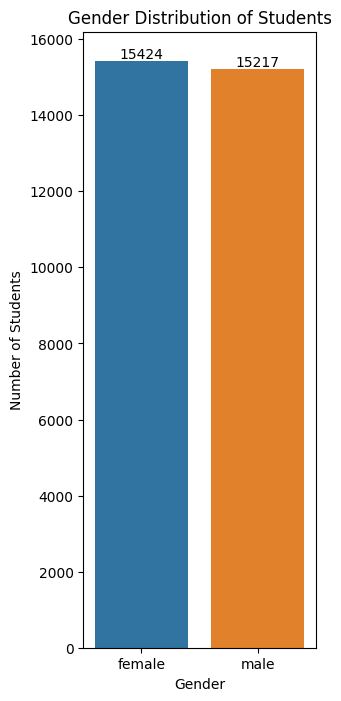

In [52]:
plt.figure(figsize = (3,8))
ax = sns.countplot(data = df, x = "Gender", hue = "Gender")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Gender Distribution of Students")
plt.ylabel("Number of Students")
plt.show()

### Based on the chart above, the number of females exceeds the number of males.

In [124]:
gp = df.groupby("Gender").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gp)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.049839     72.826300     72.826300
male    69.088969     65.878168     63.937322


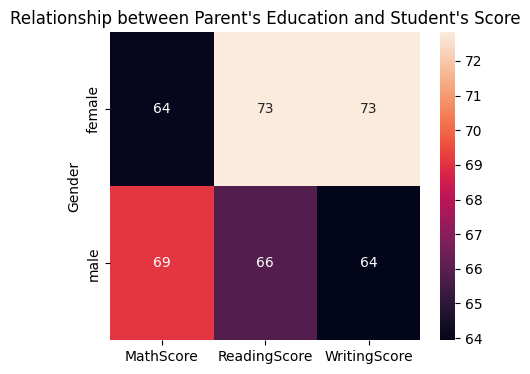

In [125]:
plt.figure(figsize = (5,4))
sns.heatmap(gp, annot = True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

### From the analysis, it is evident that female students excelled in reading and writing, while male students demonstrated superior performance in mathematics

# Parent Education

In [25]:
gp1 = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gp1)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


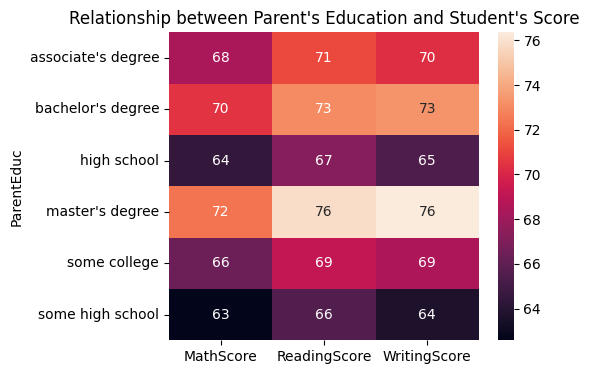

In [126]:
plt.figure(figsize = (5,4))
sns.heatmap(gp1, annot = True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

### Based on the chart, parental education positively influences their children's scores.

# Parent Marital Status

In [27]:
gp2 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gp2)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


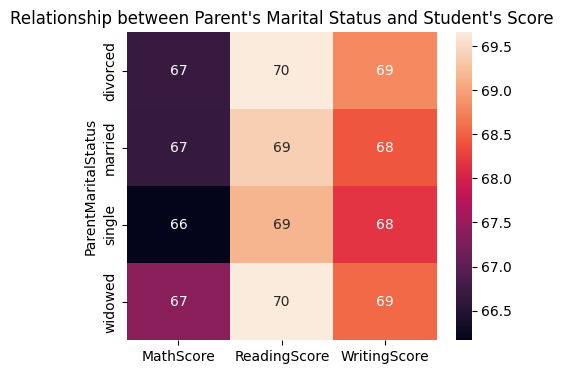

In [34]:
plt.figure(figsize = (5,4))
sns.heatmap(gp2, annot = True)
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show()

### Based on the above chart, we can conclude that parental marital status has a negligible impact on student scores.

# Identification of extreme outliers

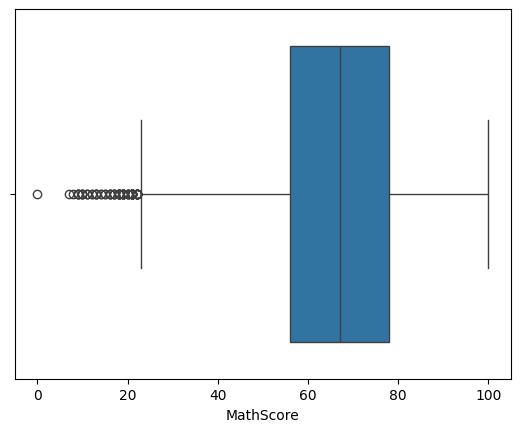

In [54]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

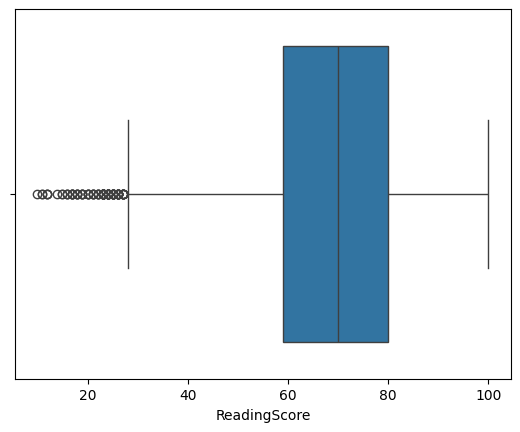

In [55]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

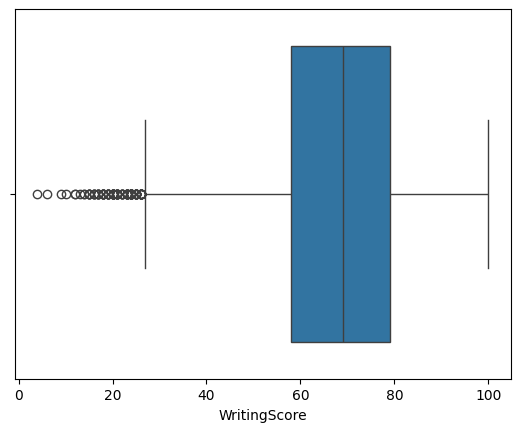

In [56]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

### The MathScore has a significantly low minimum value, suggesting that mathematics is the most difficult subject for students to achieve high marks compared to reading and writing.

# Distribution of Ethnic Groups

In [122]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


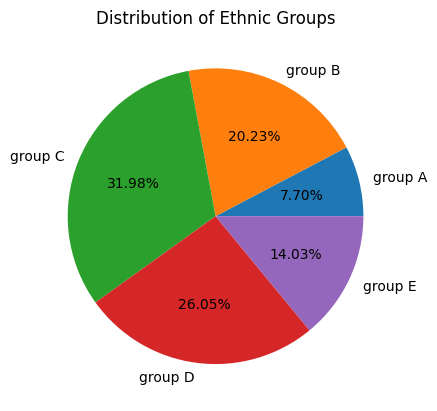

[2219, 5826, 9212, 7503, 4041]


In [77]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["group A", "group B", "group C", "group D", "group E"]
mylist = [groupA["EthnicGroup"], groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mylist, labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Groups")
plt.show()
print(mylist)

### The Group C ethnic group has the highest number of students.

# Weekly Study Hours Analysis

In [85]:
print(df["WklyStudyHours"].unique())

['< 5' '5-10' '> 10' nan]


In [96]:
df.dropna(subset = ["WklyStudyHours"], inplace = True)

In [97]:
df.isnull().sum()

Gender                    0
EthnicGroup            1771
ParentEduc             1783
LunchType                 0
TestPrep               1779
ParentMaritalStatus    1156
PracticeSport           611
IsFirstChild            881
NrSiblings             1527
TransportMeans         3044
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [98]:
gp3 = df.groupby("WklyStudyHours").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gp3)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5-10            66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


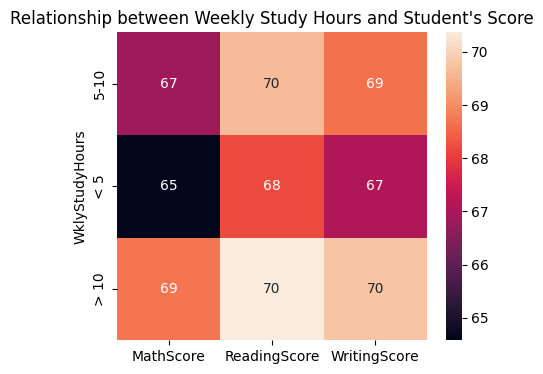

In [99]:
plt.figure(figsize = (5,4))
sns.heatmap(gp3, annot = True)
plt.title("Relationship between Weekly Study Hours and Student's Score")
plt.show()

### It can be observed that students who study for more than 10 hours have comparatively higher scores than the other two groups.

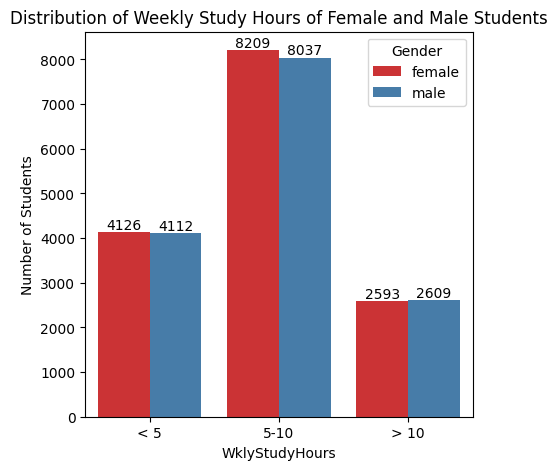

In [120]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = "WklyStudyHours", hue = "Gender", palette = "Set1")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Distribution of Weekly Study Hours of Female and Male Students")
plt.ylabel("Number of Students")
plt.show()

### The chart indicates that the majority of students study between 5 to 10 hours per week.